In [202]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sb
from matplotlib.cbook import boxplot_stats

# Создание выборки

In [203]:
n=3500
mu, sigma = -3,9 

s = np.random.normal(mu, sigma, n)
a_estimate=np.mean(s)
sigma_estimate=np.std(s,ddof=1)
print(a_estimate,sigma_estimate,"\n")
print(s)



-3.0706630592012423 8.977764721547327 

[-12.89371102   1.21060138   1.72334478 ...   1.19627076   0.8284154
  -1.91683725]


# Нахождение количества интервалов

In [204]:

q1 = np.percentile(s, 25)
q3 = np.percentile(s, 75)
IQR = q3 - q1

k_bins =round(2*IQR*n**(-1/3))
print (k_bins)

2


# Работа с абсолютными частотами

Абсолютные частоты:  [1843. 1657.] 

Сумма абсолютных частот:  3500.0 



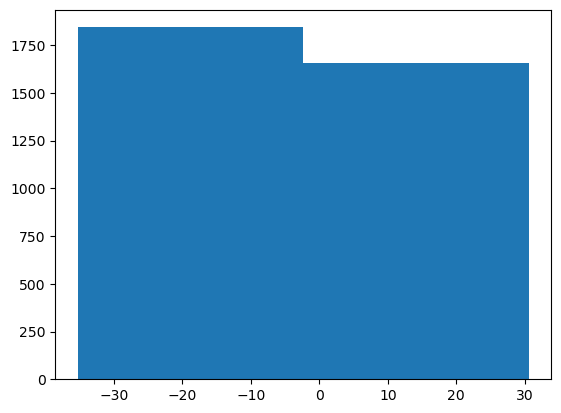

In [205]:
count, bins, ignored  = plt.hist(s, k_bins)
print("Абсолютные частоты: ", count, "\n")
print("Сумма абсолютных частот: ", sum(count), "\n")


# Работа с относительными частотами

[0.01599233 0.01437835]


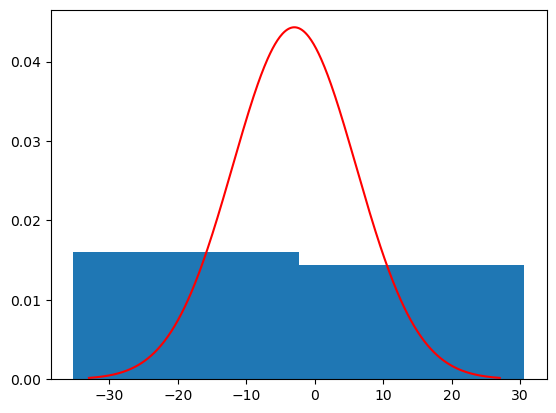

In [206]:
count, bins, ignored  = plt.hist(s, k_bins, density=True)
print(count)

x = np.linspace(-33,27,500)
pdf = sci.stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color ="r")


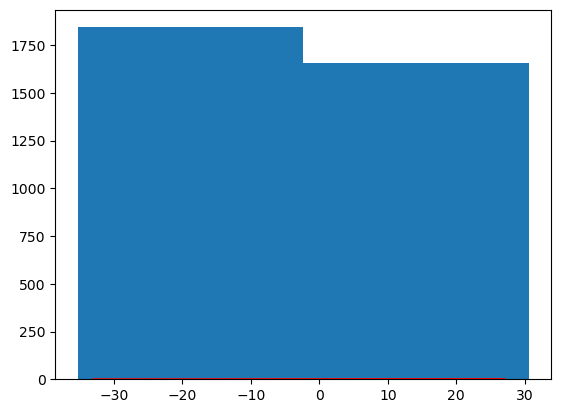

In [207]:
count, bins, ignored  = plt.hist(s, k_bins)

x = np.linspace(-33,27,500)
pdf = sci.stats.norm.cdf(x, mu, sigma)
plt.plot(x, pdf, color ="r")

# Комулята

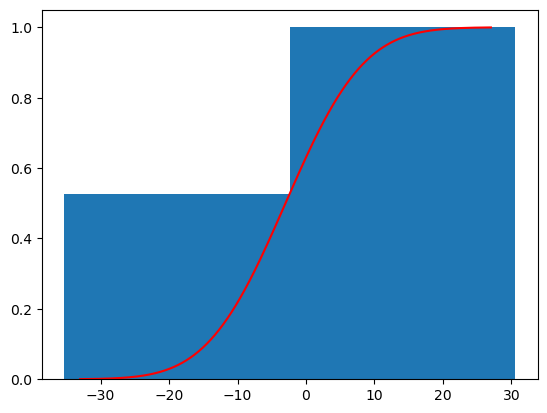

In [208]:
count, bins, ignored  = plt.hist(s, k_bins, density=True, cumulative=True)

x = np.linspace(-33,27,500)
pdf = sci.stats.norm.cdf(x, mu, sigma)
plt.plot(x, pdf, color ="r")

# Ящик с усами

<Axes: >

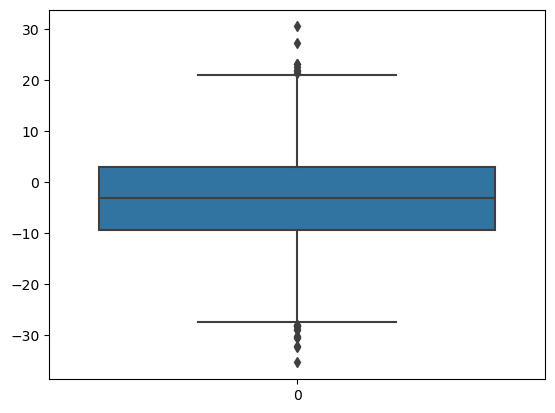

In [209]:
sb.boxplot(s)

# Нахождение вероятностей

In [210]:
q=1.5
lower_bound =  - q * sigma - mu
upper_bound =  q * sigma - mu
 
probability = sci.stats.norm.cdf(upper_bound, loc=mu, scale=sigma) - sci.stats.norm.cdf(lower_bound, loc=mu, scale=sigma) 
 
print(f"Вероятность P(|X - M(X)| < q * sigma): {probability:.4f}")

Вероятность P(|X - M(X)| < q * sigma): 0.7825


In [211]:
con= np.abs(s - mu) < q * sigma 
frequency = np.sum(con) / n 
 
print(f'Относительная частота события |X - M(X)| < {q} * σ(Y): {frequency:.4f}')

Относительная частота события |X - M(X)| < 1.5 * σ(Y): 0.8674
